In [1]:
import os
import numpy as np
# emanu 
import emanu.hades.readsnap as RS
from emanu.hades import readfof
from emanu.hades import data as hadesData
from emanu import forwardmodel as FM 
# corrfunc 
from Corrfunc.theory import wp

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
%timeit RS.read_gadget_header('/Users/ChangHoon/data/emanu/halos/hades/0.0eV/1/snapdir_004/snap_004')

The slowest run took 57.26 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 65.1 µs per loop


In [4]:
%timeit readfof.FoF_catalog('/Users/ChangHoon/data/emanu/halos/hades/0.0eV/1', 4, long_ids=False, swap=False, SFR=False)

The slowest run took 6.04 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 83 ms per loop


In [5]:
%timeit hadesData.hadesMnuHalos(0., 1, 4, mh_min=3200., dir='/Users/ChangHoon/data/emanu/halos/hades/0.0eV/1')

1 loop, best of 3: 1.39 s per loop


In [6]:
halos = hadesData.hadesMnuHalos(0., 1, 4, mh_min=3200., dir='/Users/ChangHoon/data/emanu/halos/hades/0.0eV/1')

In [7]:
%timeit FM.hodGalaxies(halos, {'logMmin': 13.5, 'sigma_logM': 0.58, 'logM0': 12.59, 'alpha':1.24, 'logM1': 14.55})

/anaconda2/lib/python2.7/site-packages/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:205: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]
/anaconda2/lib/python2.7/site-packages/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:522: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]


1 loop, best of 3: 642 ms per loop


In [8]:
hod = FM.hodGalaxies(halos, {'logMmin': 13.5, 'sigma_logM': 0.58, 'logM0': 12.59, 'alpha':1.24, 'logM1': 14.55})

In [9]:
%timeit hod.repopulate(10)

10 loops, best of 3: 186 ms per loop


In [10]:
print(np.array(hod['x']))

[254.06265  503.42038   79.560455 ... 909.6136   949.7993   973.6329  ]


In [11]:
zslice = (np.array(hod['halo_z']) < 50.)
print np.sum(zslice)

6736


(15.0, 30.0)

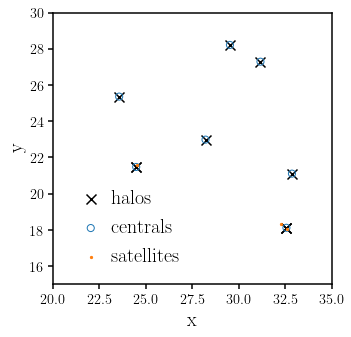

In [12]:
fig = plt.figure(figsize=(5,5))
sub = fig.add_subplot(111)
sub.scatter(np.array(hod['halo_x'])[zslice], np.array(hod['halo_y'])[zslice], c='k', s=100, marker='x', label='halos')
centrals = (np.array(hod['gal_type']) == 0) & zslice
sub.scatter(np.array(hod['x'])[centrals], np.array(hod['y'])[centrals], 
            edgecolors='C0', facecolors='none', s=50, label='centrals')
satellites = (np.array(hod['gal_type']) == 1) & zslice
sub.scatter(np.array(hod['x'])[satellites], np.array(hod['y'])[satellites], c='C1', s=5, label='satellites')
sub.legend(loc='lower left', handletextpad=0, fontsize=20)
sub.set_xlabel('x', fontsize=20)
sub.set_xlim(20., 35.)
sub.set_ylabel('y', fontsize=20)
sub.set_ylim(15., 30.)

In [26]:
rbin = np.logspace(-1, np.log10(20), 12)

In [27]:
wp_r = wp(1000., 40., 1, rbin, np.array(hod['x']), np.array(hod['y']), np.array(hod['z']), verbose=True, output_rpavg=False)

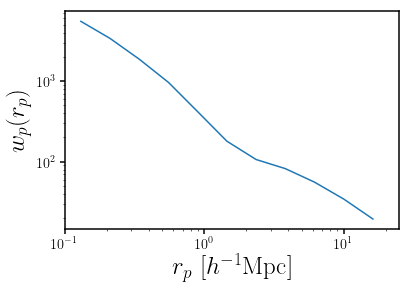

In [37]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.plot(0.5*(rbin[1:] + rbin[:-1]), wp_r['wp'])
sub.set_xlabel(r'$r_p$ [$h^{-1}{\rm Mpc}$]', fontsize=25) 
sub.set_xscale('log') 
sub.set_xlim(1e-1, 25) 
sub.set_ylabel(r'$w_p(r_p)$', fontsize=25) 
sub.set_yscale('log') 

In [41]:
xyz = np.array(hod['Position'])

In [46]:
xyz_s = FM.RSD(hod)

In [48]:
wp_r_s= wp(1000., 40., 1, rbin, xyz_s[:,0], xyz_s[:,1], xyz_s[:,2], verbose=True, output_rpavg=False)

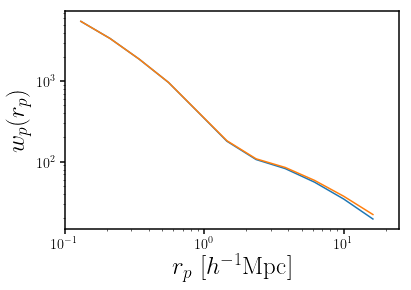

In [50]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.plot(0.5*(rbin[1:] + rbin[:-1]), wp_r['wp'])
sub.plot(0.5*(rbin[1:] + rbin[:-1]), wp_r_s['wp'])
sub.set_xlabel(r'$r_p$ [$h^{-1}{\rm Mpc}$]', fontsize=25) 
sub.set_xscale('log') 
sub.set_xlim(1e-1, 25) 
sub.set_ylabel(r'$w_p(r_p)$', fontsize=25) 
sub.set_yscale('log') 